In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import shutil

In [ ]:
import glob
path = "/content/drive/MyDrive/pngs/001077.png"
dest_path = "/content/drive/MyDrive/result/bluepng"

print(glob.glob("/content/drive/MyDrive/pngs/*.png")) #all png files in this directory
list_of_pngs = glob.glob("/content/drive/MyDrive/pngs/*.png")
print(list_of_pngs[9000])

['/content/drive/MyDrive/pngs/319010.png', '/content/drive/MyDrive/pngs/318822.png', '/content/drive/MyDrive/pngs/319006.png', '/content/drive/MyDrive/pngs/318707.png', '/content/drive/MyDrive/pngs/318907.png', '/content/drive/MyDrive/pngs/319142.png', '/content/drive/MyDrive/pngs/319002.png', '/content/drive/MyDrive/pngs/318654.png', '/content/drive/MyDrive/pngs/319255.png', '/content/drive/MyDrive/pngs/318691.png', '/content/drive/MyDrive/pngs/319110.png', '/content/drive/MyDrive/pngs/318303.png', '/content/drive/MyDrive/pngs/318619.png', '/content/drive/MyDrive/pngs/319114.png', '/content/drive/MyDrive/pngs/319120.png', '/content/drive/MyDrive/pngs/318807.png', '/content/drive/MyDrive/pngs/318594.png', '/content/drive/MyDrive/pngs/319108.png', '/content/drive/MyDrive/pngs/319193.png', '/content/drive/MyDrive/pngs/318696.png', '/content/drive/MyDrive/pngs/319019.png', '/content/drive/MyDrive/pngs/319177.png', '/content/drive/MyDrive/pngs/319004.png', '/content/drive/MyDrive/pngs/3187

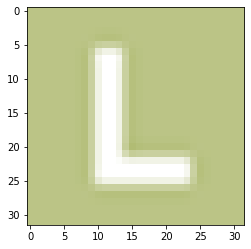

In [ ]:
path = str(list_of_pngs[7777])
img = cv2.imread(path,1)
plt.imshow(img)

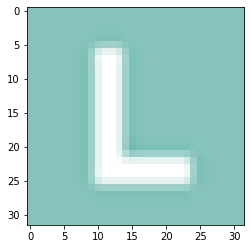

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
color_dict_HSV = {'black': [[180, 255, 30], [0, 0, 0]],
              'white': [[180, 18, 255], [0, 0, 231]],
              'red1': [[180, 255, 255], [159, 50, 70]],
              'red2': [[9, 255, 255], [0, 50, 70]],
              'green': [[89, 255, 255], [36, 50, 70]],
              'blue': [[128, 255, 255], [90, 50, 70]],
              'yellow': [[35, 255, 255], [25, 50, 70]],
              'purple': [[158, 255, 255], [129, 50, 70]],
              'orange': [[24, 255, 255], [10, 50, 70]],
              'gray': [[180, 18, 230], [0, 0, 40]]}

In [ ]:
for i in range(len(list_of_pngs)):
    path = str(list_of_pngs[i])
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img=img.reshape((32*32,3))

    kmeans=KMeans(n_clusters=3)
    s=kmeans.fit(img)

    labels=kmeans.labels_
    
    labels=list(labels)

    centroid=kmeans.cluster_centers_

    k = 0
    for j in range(3):
        col = np.uint8([[centroid[j]]]) 
        hsv = cv2.cvtColor(col, cv2.COLOR_RGB2HSV)
        _hsv_ = np.array([hsv[0][0][0],hsv[0][0][1],hsv[0][0][2]])
        blue_color = False
        if _hsv_[0] < color_dict_HSV['blue'][0][0] and _hsv_[0] > color_dict_HSV['blue'][1][0] and _hsv_[1] < color_dict_HSV['blue'][0][1]:
            if _hsv_[1] > color_dict_HSV['blue'][1][1] and _hsv_[2] < color_dict_HSV['blue'][0][2]:
                if _hsv_[2] > color_dict_HSV['blue'][1][2]:
                    blue_color = True
                    k+=1
    print("Count of blue colors in logo: " + str(k))
    if k>0:
        shutil.copyfile(list_of_pngs[i], dest_path+list_of_pngs[i][28:])
print("Done, check folder result")